In [17]:
import pandas as pd
import numpy as np
df = pd.read_excel(r"C:\Users\adishree.b\Documents\practice datasets\Analytics test-29th.xlsx",skiprows=5)

In [9]:
df.iloc[0,:]

Unnamed: 0                        Month
Unnamed: 1                      Weekday
Unnamed: 2           SF_Advertiser_Name
Unnamed: 3    SF_Network_Placement_Name
Unnamed: 4                  Device Type
Unnamed: 5                Creative Size
Unnamed: 6               SF_Client_Goal
Unnamed: 7       SF_Client_Goal_Details
Unnamed: 8                  Impressions
Unnamed: 9                       Clicks
Name: 0, dtype: object

In [23]:
colnames = np.array(df.iloc[0,:])
colnames

array(['Month', 'Weekday', 'SF_Advertiser_Name',
       'SF_Network_Placement_Name', 'Device Type', 'Creative Size',
       'SF_Client_Goal', 'SF_Client_Goal_Details', 'Impressions',
       'Clicks'], dtype=object)

In [25]:
df.columns = colnames
df.columns

Index(['Month', 'Weekday', 'SF_Advertiser_Name', 'SF_Network_Placement_Name',
       'Device Type', 'Creative Size', 'SF_Client_Goal',
       'SF_Client_Goal_Details', 'Impressions', 'Clicks'],
      dtype='object')

In [41]:
df.head()

,Month,Weekday,SF_Advertiser_Name,SF_Network_Placement_Name,Device Type,Creative Size,SF_Client_Goal,SF_Client_Goal_Details,Impressions,Clicks
0,Month,Weekday,SF_Advertiser_Name,SF_Network_Placement_Name,Device Type,Creative Size,SF_Client_Goal,SF_Client_Goal_Details,Impressions,Clicks
1,2019-09-01 00:00:00,Friday,Other,Other,Connected TV,1x1,Other,Other,22224,0
2,2019-09-01 00:00:00,Wednesday,Church & Dwight,ENG:CAD-C&D_RepHresh_2019-XaxRTB-Look-a-like_T...,Tablet,160x600,CPC,$5 - $7,2,0
3,2019-09-01 00:00:00,Sunday,Pfizer,ENG:CAD-Pfizer_Nexium_Advil_Base_Q3_2019-XaxRT...,Tablet,160x600,CTR,.06-.12%,115,0
4,2019-09-01 00:00:00,Wednesday,BEHR,ENG:CAD-Behr_2019_Labour_Day_Promo-XAXRTB_Perf...,Mobile,160x600,Viewability (GroupM),100% vCPM,15,0


In [50]:
df.drop(0,inplace = True)

In [42]:
df.replace('Other',np.nan, inplace = True)
df.isnull().sum()

Month                            0
Weekday                          0
SF_Advertiser_Name            2046
SF_Network_Placement_Name     2046
Device Type                    711
Creative Size                16340
SF_Client_Goal                2046
SF_Client_Goal_Details        2046
Impressions                      0
Clicks                         210
dtype: int64

In [43]:
df['Creative Size'].fillna('other',inplace = True)

In [44]:
df.shape

(137933, 10)

In [45]:
df.dropna(inplace = True)

In [47]:
df.shape

(134966, 10)

In [48]:
df['SF_Client_Goal'].value_counts()

CTR                       50003
100% Completion Rate      24954
Viewability (GroupM)      21468
CPA                       21176
Other (Please specify)     8657
CPC                        5384
On-Target % (DAR)          1414
Unique Audience Reach       689
Revenue / Conversions       617
ROAS                        511
Viewability (MRC)            92
SF_Client_Goal                1
Name: SF_Client_Goal, dtype: int64

In [145]:
data = df[df['SF_Client_Goal']=='CTR']

# Creating the logistic function of client goal achievement

In [147]:
data.to_csv(r"C:\Users\adishree.b\Documents\practice datasets\CTR_Analytics.csv")

In [148]:
# data['goal_extract'] = data['SF_Client_Goal_Details'].str.extract('.(.*)%')

# extract values of %. 
# Extract max and min from between and '-'
# Extract for lang(Eng and Fre) with if condition
# Extract for different placements given

In [149]:
extractor = np.array(data['SF_Client_Goal_Details'].value_counts().reset_index()['index'])

In [150]:
extractor_val = np.array(['.20', '.10', '0.10', '0.06', '.10', '0.10','0.1','0.10', '.05', '0.06', '.04','.01', 
                         '0.08','.1', '0.1', '.04','0.02', '0.12', '.05%', '.04%', '0.07', '.06','.10', '0.02', 
                         '0.10','.1','0.04', '.04','.04','0.07', '0.10', '0.08', '.12','0.08', '.13', '.04','0.10'])
extractor_val = extractor_val.astype('str')

In [151]:
    #for i in extractor:
    #    n=0
    #    data['extracted_goal'] = data['SF_Client_Goal_Details'].str.replace(i,extractor_val[n])
    #    n=n+1

# After changing in excel

In [161]:
df1 = pd.read_csv(r"C:\Users\adishree.b\Documents\practice datasets\CTR_Analytics_updated.csv")

In [164]:
df1['SF_Client_Goal_Details'].value_counts()

0.10    23547
0.06     7790
0.04     4887
0.20     4722
0.05     2751
0.08     2198
0.02     1557
0.12     1284
0.07     1156
0.13       83
0.25       28
Name: SF_Client_Goal_Details, dtype: int64

In [163]:
df1['SF_Client_Goal_Details']=df1['SF_Client_Goal_Details'].astype('float')

In [173]:
df2 = df1[df1['Impressions']>999]

In [167]:
df1['CTR'] = df1['Clicks'] / df1['Impressions']

In [169]:
df1['achieved']=np.where(df1['CTR']>=df1['SF_Client_Goal_Details'],1,0)

In [174]:
df2['achieved'].value_counts()

0    23719
Name: achieved, dtype: int64

# Using linear regression

In [175]:
df.isnull().sum()

Month                        0
Weekday                      0
SF_Advertiser_Name           0
SF_Network_Placement_Name    0
Device Type                  0
Creative Size                0
SF_Client_Goal               0
SF_Client_Goal_Details       0
Impressions                  0
Clicks                       0
dtype: int64

In [181]:
df.columns

Index(['Month', 'Weekday', 'SF_Advertiser_Name', 'SF_Network_Placement_Name',
       'Device Type', 'Creative Size', 'SF_Client_Goal',
       'SF_Client_Goal_Details', 'Impressions', 'Clicks'],
      dtype='object')

In [182]:
df['Impressions']=df['Impressions'].astype('int')
df['Clicks']=df['Clicks'].astype('int')

In [200]:
df.drop(columns = ['SF_Client_Goal','SF_Client_Goal_Details','SF_Network_Placement_Name'],axis = 1,inplace=True)
df.head(2)

,Month,Weekday,SF_Advertiser_Name,Device Type,Creative Size,Impressions,Clicks
2,9,Wednesday,Church & Dwight,Tablet,160x600,2,0
3,9,Sunday,Pfizer,Tablet,160x600,115,0


In [195]:
df['Month']=pd.to_datetime(df['Month']).dt.month
df.head(2)

,Month,Weekday,SF_Advertiser_Name,SF_Network_Placement_Name,Device Type,Creative Size,SF_Client_Goal,SF_Client_Goal_Details,Impressions,Clicks
2,9,Wednesday,Church & Dwight,ENG:CAD-C&D_RepHresh_2019-XaxRTB-Look-a-like_T...,Tablet,160x600,CPC,$5 - $7,2,0
3,9,Sunday,Pfizer,ENG:CAD-Pfizer_Nexium_Advil_Base_Q3_2019-XaxRT...,Tablet,160x600,CTR,.06-.12%,115,0


In [202]:
df_a = df[df['Impressions']>499]

In [204]:
df_a['CTR'] = df_a['Clicks'] / df_a['Impressions']

C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\envs\python3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
q99 = df_a['CTR'].quantile(.975)
q1  = df_a['CTR'].quantile(.025)

df1 = df_a[df_a['CTR']<q99]
df1.describe(include='all')

,Month,Weekday,SF_Advertiser_Name,Device Type,Creative Size,Impressions,Clicks,CTR
count,74146.000000,74146,74146,74146,74146,7.414600e+04,74146.000000,74146.000000
unique,NaN,7,26,11,10,NaN,NaN,NaN
top,NaN,Tuesday,Church & Dwight,Desktop,300x250,NaN,NaN,NaN
freq,NaN,10667,15058,26750,17487,NaN,NaN,NaN
mean,6.216613,NaN,NaN,NaN,NaN,2.435774e+04,47.943288,0.001856
std,2.922862,NaN,NaN,NaN,NaN,6.109000e+04,203.804627,0.003355
min,1.000000,NaN,NaN,NaN,NaN,5.000000e+02,0.000000,0.000000
25%,4.000000,NaN,NaN,NaN,NaN,1.983250e+03,1.000000,0.000226
50%,6.000000,NaN,NaN,NaN,NaN,6.350000e+03,5.000000,0.000776
75%,8.000000,NaN,NaN,NaN,NaN,2.103175e+04,21.000000,0.001910


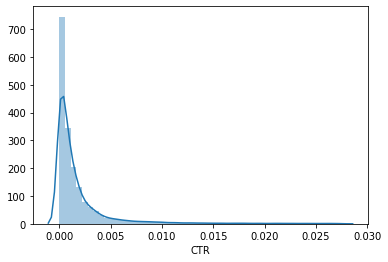

In [213]:
import seaborn as sns
%matplotlib inline

sns.distplot(df1['CTR'])

In [215]:
df1.columns

Index(['Month', 'Weekday', 'SF_Advertiser_Name', 'Device Type',
       'Creative Size', 'Impressions', 'Clicks', 'CTR'],
      dtype='object')

In [218]:
df1['Month']=df1['Month'].astype('str')

C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\envs\python3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [220]:
variables = df1[['Month', 'Weekday', 'SF_Advertiser_Name', 'Device Type',
       'Creative Size']]
df_dum = pd.get_dummies(variables, drop_first=True)

In [222]:
df_dum[['Impressions','Clicks','CTR']] = df1[['Impressions','Clicks','CTR']]

In [233]:
df_dum = df_dum.astype(float)

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [235]:
melb_target = df_dum['CTR']
new_target = df1['Impressions']
melb_predictors = df_dum.drop(['CTR','Clicks','Impressions'], axis=1)

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(melb_predictors,new_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=1)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (51902, 61)
X_test : (22244, 61)
y_train : (51902,)
y_test : (22244,)


In [237]:
import tensorflow as tf

generated_inputs = melb_predictors

generated_targets = new_target

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [238]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')

In [239]:
generated_inputs.shape

(74146, 61)

In [240]:
# Declare a variable where we will store the input size of our model
# It should be equal to the number of variables you have
input_size = 61
# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regressions that's usually 1)
output_size = 1

# Outline the model
# We lay out the model in 'Sequential'
# Note that there are no calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=0, maxval=0.02),
                                                 bias_initializer=tf.random_uniform_initializer(minval=0, maxval=0.02)
                                                 )
                            ])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Note that sometimes you may also need a custom loss function 
# That's much harder to implement and won't be covered in this course though

# 'compile' is the place where you select and indicate the optimizers and the loss
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# finally we fit the model, indicating the inputs and targets
# if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
# so the number of epochs is 'kind of' mandatory, too
# we can play around with verbose; we prefer verbose=2
model.fit(training_data['inputs'], training_data['targets'], epochs=20, verbose=2)

Epoch 1/20
74146/74146 - 4s - loss: 3344685994.6764
Epoch 2/20
74146/74146 - 3s - loss: 3258405303.3736
Epoch 3/20
74146/74146 - 4s - loss: 3241929217.8377
Epoch 4/20
74146/74146 - 4s - loss: 3231916917.3693
Epoch 5/20
74146/74146 - 4s - loss: 3227585623.4564
Epoch 6/20
74146/74146 - 3s - loss: 3221384608.5412
Epoch 7/20
74146/74146 - 4s - loss: 3217549737.5164
Epoch 8/20
74146/74146 - 4s - loss: 3212800104.0841
Epoch 9/20
74146/74146 - 3s - loss: 3211048165.5855
Epoch 10/20
74146/74146 - 4s - loss: 3206509425.4143
Epoch 11/20
74146/74146 - 4s - loss: 3204054230.7741
Epoch 12/20
74146/74146 - 4s - loss: 3202201276.3551
Epoch 13/20
74146/74146 - 3s - loss: 3200736857.7464
Epoch 14/20
74146/74146 - 4s - loss: 3198773581.9470
Epoch 15/20
74146/74146 - 4s - loss: 3197385957.5078
Epoch 16/20
74146/74146 - 4s - loss: 3196924443.1413
Epoch 17/20
74146/74146 - 4s - loss: 3192771455.1249
Epoch 18/20
74146/74146 - 4s - loss: 3194187387.2657
Epoch 19/20
74146/74146 - 4s - loss: 3191409898.7800
Ep

In [243]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
weights

array([[  6356.366  ],
       [ 11619.985  ],
       [ 19160.232  ],
       [  -189.58571],
       [  3914.1106 ],
       [  5257.47   ],
       [  4962.7666 ],
       [  2794.9377 ],
       [  2806.3774 ],
       [  5973.1904 ],
       [  -320.58447],
       [  -597.3627 ],
       [ -1088.0234 ],
       [ -1428.8434 ],
       [  1683.575  ],
       [ -2692.269  ],
       [  -859.37915],
       [-22283.516  ],
       [-69482.53   ],
       [-28352.758  ],
       [-39355.57   ],
       [-42820.625  ],
       [ -8849.919  ],
       [ 41946.324  ],
       [-47814.94   ],
       [-57581.85   ],
       [ 16934.422  ],
       [-38800.02   ],
       [-41086.93   ],
       [-45447.023  ],
       [-36796.863  ],
       [ 12034.225  ],
       [-24666.96   ],
       [-34341.55   ],
       [-48251.836  ],
       [-17919.238  ],
       [-34070.12   ],
       [-41308.668  ],
       [ -1280.9327 ],
       [189224.7    ],
       [-28531.521  ],
       [-17015.025  ],
       [-21073.93   ],
       [  9

In [244]:

# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

array([29738.404], dtype=float32)

In [255]:
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
output_value = model.predict_on_batch(training_data['inputs'])

In [256]:
mse = tf.reduce_mean(tf.square(output_value - training_data['targets']))

MemoryError: 

In [ ]:
rmse = np.sqrt(mse)
rmse

In [251]:
training_data['targets'].shape

(74146,)

In [252]:
output_value.shape

(74146, 1)

In [254]:
type(training_data['targets'])

numpy.ndarray